In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vsath\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
data = pd.read_csv(r'D:\SkillDzire\Artificial Intelligence\Flipkart Reviews Sentiment Analysis using Python\code\flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [15]:
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


<AxesSubplot:xlabel='rating', ylabel='count'>

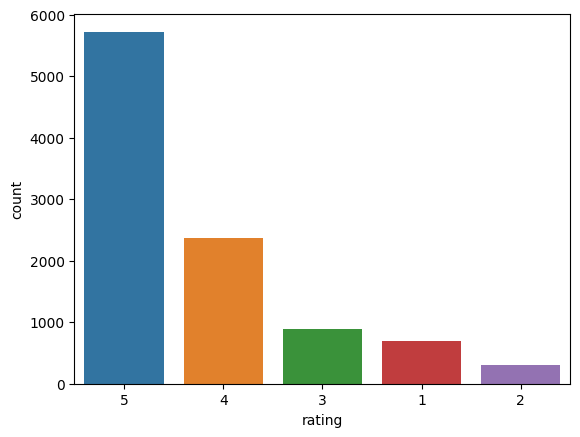

In [17]:
sns.countplot(data=data,
              x='rating',
              order=data.rating.value_counts().index)

In [18]:
# rating label if rating is <= 4, then replace it  negative(0) else positive(1)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg

In [22]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as SK_STOPWORDS

def preprocess_text_no_nltk(texts):
    preprocessed_text = []
    for sentence in texts:
        if not isinstance(sentence, str):
            sentence = ''
        sentence = sentence.lower()
        sentence = re.sub(r'\s+', ' ', sentence).strip()
        # tokenize using regex (words only)
        tokens = re.findall(r'\b\w+\b', sentence)
        filtered = [t for t in tokens if t not in SK_STOPWORDS]
        preprocessed_text.append(' '.join(filtered))
    return preprocessed_text


In [24]:
preprocessed_review = preprocess_text_no_nltk(data['review'].values)
data['review'] = preprocessed_review
data.head()

,review,rating,label
0,nice produt like s design lot s easy carry loo...,5,1
1,awesome sound pretty nd sound quality good wis...,5,1
2,awesome sound quality pros 7 8 hrs battery lif...,4,0
3,think good product quality design quite good m...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [25]:
data["label"].value_counts()

1    5726
0    4250
Name: label, dtype: int64

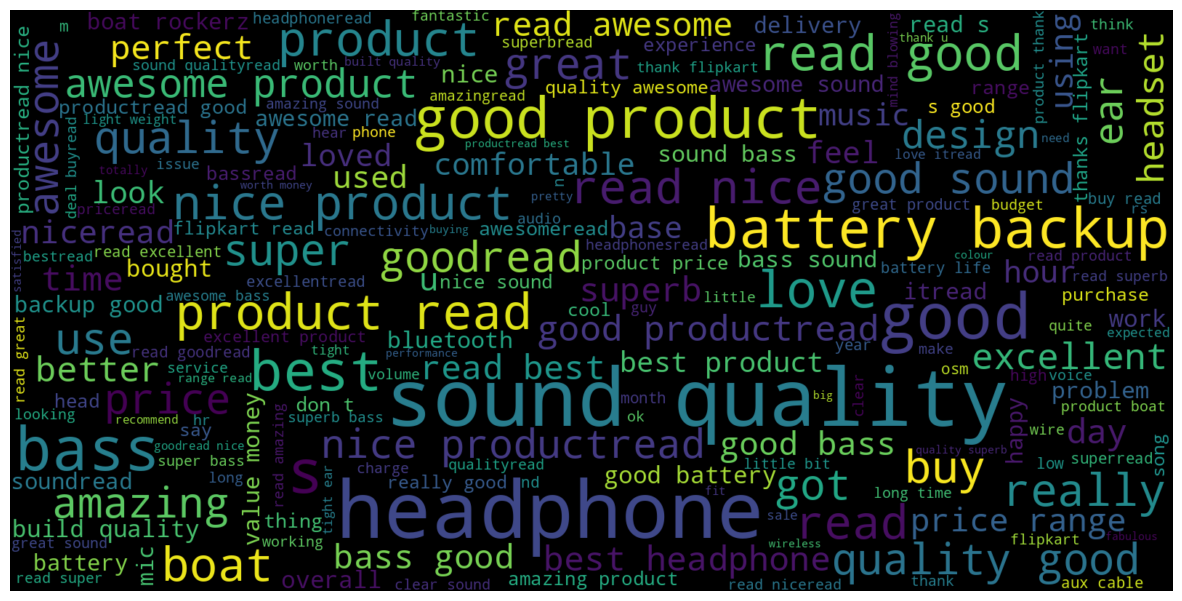

In [26]:
consolidated = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()

In [28]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [30]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 

#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

0.9245847673200659


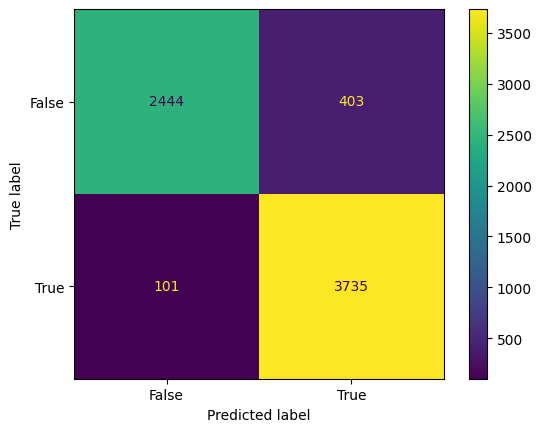

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True]) 

cm_display.plot() 
plt.show()